<a href="https://colab.research.google.com/github/DarshitSarda/ACM-tasks/blob/main/OpenAI_Whisper_Fed_Meeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenAI Whisper

To get started, we'll first install the OpenAI Whisper Python package using pip.

In [1]:
!pip install git+https://github.com/openai/whisper.git -q


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.2 MB/s eta 0:00:00


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-710769d9-421d-79fe-4ee7-0b16cc1e16f1)


Whisper transcribes audio speech to text. To see this in action, we'll need some audio to operate on. We'll extract some audio from a YouTube video using the pytube Python package. let's install it with pip.

In [3]:
!pip install pytube -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00


Now that we have installed the dependencies, let's import whisper and the YouTube class from pytube.

In [4]:
import whisper
from pytube import YouTube

Whisper has a variety of models of varying sizes. The large model will be more accurate but will also be more resource intensive.

The base model will be sufficient for our needs. Let's load the base model like so:

In [5]:
model = whisper.load_model('base')

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 50.3MiB/s]


We'll now instantiate a "YouTube" object by passing in the video URL. This will allow us to retrieve metadata and stream info about the specified YouTube URL.

In [10]:
youtube_video_url = "https://www.youtube.com/watch?v=NT2H9iyd-ms"  #this is an example, we can you custom input too
youtube_video = YouTube(youtube_video_url)

In [11]:
youtube_video.title  #title of the video that we are working on


'WATCH LIVE | Fed Chair Powell Discusses Latest Fed Rate Hike'

In [12]:
dir(youtube_video)  #what things we can access about the video, the video's metadata

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_age_restricted',
 '_author',
 '_embed_html',
 '_fmt_streams',
 '_initial_data',
 '_js',
 '_js_url',
 '_metadata',
 '_player_config_args',
 '_publish_date',
 '_title',
 '_vid_info',
 '_watch_html',
 'age_restricted',
 'allow_oauth_cache',
 'author',
 'bypass_age_gate',
 'caption_tracks',
 'captions',
 'channel_id',
 'channel_url',
 'check_availability',
 'description',
 'embed_html',
 'embed_url',
 'fmt_streams',
 'from_id',
 'initial_data',
 'js',
 'js_url',
 'keywords',
 'length',
 'metadata',
 'publish_date',
 'rating',
 'register_on_complete_callback',
 'register_on_progress_callback',
 'stream_monostate',
 'streamin

In [13]:
youtube_video.streams

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="244" mime_type="video/webm" res="480p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="1

As you can see, we have a list of video and audio streams of varying quality. We can iterate over this list and observe the different resolutions and framerates.

In [14]:
for stream in youtube_video.streams:
  print(stream)

<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">
<Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001f" progressive="False" type="video">
<Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<Stream: itag="244" mime_type="video/webm" res="480p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="134" mime_

In [15]:
streams = youtube_video.streams.filter(only_audio=True)  #filter down to audio only because we are working just on the audio part
streams


[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="249" mime_type="audio/webm" abr="50kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="250" mime_type="audio/webm" abr="70kbps" acodec="opus" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

We don't need the highest quality audio for this project, so we'll select the first audio stream available. If we want a higher quality transcription, we can select a higher quality audio stream and use a larger Whisper model. But for  this project the base model will work good enough.

In [16]:
stream = streams.first()
stream

<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">

Now that we have selected stream we are working with, let's download the stream as fed_meeting.mp4. You should see the file appear in the filesystem browser on the side panel of Colab.

In [17]:
stream.download(filename='fed_meeting_download.mp4')

'/content/fed_meeting_download.mp4'

We can do some additional processing on the audio file should we choose. I want to ignore any additional sound and speech after Jerome Powell speaks. So we'll use ffmpeg to do this. The command will start the audio file at the 375 second mark where he starts with good afternoon, continue for 2715 seconds, and chop off the rest of the audio. The result will be saved in a new file called fed_meeting_trimmed.mp4.

In [19]:
!ffmpeg -ss 378 -i fed_meeting_download.mp4 -t 2715 fed_meeting_trimmed.mp4  #using this code we just use the piece of audio that is necessry because if you look at the video, these are the timestamps where Mr. Powell speaks.

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [20]:
import datetime

# save a timestamp before transcription
t1 = datetime.datetime.now()
print(f"started at {t1}")

# do the transcription
output = model.transcribe("fed_meeting_trimmed.mp4")

# show time elapsed after transcription is complete.
t2 = datetime.datetime.now()
print(f"ended at {t2}")
print(f"time elapsed: {t2 - t1}")

started at 2024-05-06 06:12:49.636762
ended at 2024-05-06 06:14:56.898915
time elapsed: 0:02:07.262153


In [22]:
output  #this is the text output of the speech given by Mr Powell

{'text': " Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of po

In [23]:
output['text']

" Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal. We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses. Price stability is the responsibility of the Federal Reserve and serves as the bedrock of our economy. Without price stability, the economy does not work for anyone. In particular, without price stability, we will not achieve a sustained period of strong labor market conditions that benefit all. Today, the FOMC raised our policy interest rate by 75 basis points and we continue to anticipate that ongoing increases will be appropriate. We are moving our policy stance purposefully to a level that will be sufficiently restrictive to return inflation to 2%. In addition, we are continuing the process of significantly reducing the size of our balance sheet. Restoring price stability will likely require maintaining a restrictive stance of policy for 

In [24]:
for segment in output['segments']:
  print(segment)
  second = int(segment['start'])
  second = second - (second % 5)
  print(second)

{'id': 0, 'seek': 0, 'start': 0.0, 'end': 8.0, 'text': ' Good afternoon. My colleagues and I are strongly committed to bringing inflation back down to our 2% goal.', 'tokens': [50364, 2205, 6499, 13, 1222, 7734, 293, 286, 366, 10613, 7784, 281, 5062, 15860, 646, 760, 281, 527, 568, 4, 3387, 13, 50764], 'temperature': 0.0, 'avg_logprob': -0.14398061906969226, 'compression_ratio': 1.5818181818181818, 'no_speech_prob': 0.0643366202712059}
0
{'id': 1, 'seek': 0, 'start': 8.0, 'end': 16.0, 'text': ' We have both the tools that we need and the resolve it will take to restore price stability on behalf of American families and businesses.', 'tokens': [50764, 492, 362, 1293, 264, 3873, 300, 321, 643, 293, 264, 14151, 309, 486, 747, 281, 15227, 3218, 11826, 322, 9490, 295, 2665, 4466, 293, 6011, 13, 51164], 'temperature': 0.0, 'avg_logprob': -0.14398061906969226, 'compression_ratio': 1.5818181818181818, 'no_speech_prob': 0.0643366202712059}
5
{'id': 2, 'seek': 0, 'start': 16.0, 'end': 22.0, 'tex

## Combining Speech Data with Price Data

Now that we have this speech and the associated timestamps, we can go further by merging these segments into a dataframe containing price data. Let's see how the speech maps to the price of the S&P 500. I have retrieved 5 second OHLCV data for SPY using Interactive Brokers. A copy of this data and the code used to retrieve it are located on the website. We can upload spy.csv to Colab and process it using pandas.

In [25]:
import pandas as pd

In [27]:
!pip install ib-insync -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.4 MB/s eta 0:00:00


In [29]:
spy = pd.read_csv("spy.csv")


In the dataframe below, you can see the open, high, low, and close for each 5 second time period that occurred during the speech.

In [30]:
spy

,date,open,high,low,close,volume,average,barCount
0,02-11-2022 14:31,387.13,387.17,386.75,386.83,82173,386.884,444
1,02-11-2022 14:31,386.80,387.00,386.80,386.91,38918,386.913,234
2,02-11-2022 14:31,386.94,386.96,386.55,386.64,48165,386.749,232
3,02-11-2022 14:31,386.64,386.95,386.59,386.86,30688,386.760,190
4,02-11-2022 14:31,386.91,386.92,386.81,386.87,22270,386.862,130
5,02-11-2022 14:31,386.85,386.85,386.65,386.73,15112,386.718,112
6,02-11-2022 14:31,386.71,386.71,386.33,386.34,38814,386.503,259
7,02-11-2022 14:31,386.31,386.47,386.20,386.43,51167,386.283,360
8,02-11-2022 14:31,386.43,386.59,386.36,386.59,77731,386.440,411
9,02-11-2022 14:32,386.59,386.69,386.52,386.52,32755,386.599,220


Since we already have the segments of the speech and their start and end times in seconds, we can add a new column containing the text that was spoken during each 5 second bar.

In [31]:
for segment in output['segments']:
   second = int(segment['start'])
   second = second - (second % 5)
   spy.loc[second / 5, 'text'] = segment['text']

spy


,date,open,high,low,close,volume,average,barCount,text
0,02-11-2022 14:31,387.13,387.17,386.75,386.83,82173,386.884,444,Good afternoon. My colleagues and I are stron...
1,02-11-2022 14:31,386.80,387.00,386.80,386.91,38918,386.913,234,We have both the tools that we need and the r...
2,02-11-2022 14:31,386.94,386.96,386.55,386.64,48165,386.749,232,NaN
3,02-11-2022 14:31,386.64,386.95,386.59,386.86,30688,386.760,190,Price stability is the responsibility of the ...
4,02-11-2022 14:31,386.91,386.92,386.81,386.87,22270,386.862,130,"Without price stability, the economy does not..."
5,02-11-2022 14:31,386.85,386.85,386.65,386.73,15112,386.718,112,"In particular, without price stability, we wi..."
6,02-11-2022 14:31,386.71,386.71,386.33,386.34,38814,386.503,259,NaN
7,02-11-2022 14:31,386.31,386.47,386.20,386.43,51167,386.283,360,"Today, the FOMC raised our policy interest ra..."
8,02-11-2022 14:31,386.43,386.59,386.36,386.59,77731,386.440,411,NaN
9,02-11-2022 14:32,386.59,386.69,386.52,386.52,32755,386.599,220,We are moving our policy stance purposefully ...


Let's also create a new column called *percent* that stores the percent the price moved during the 5 second period.

In [32]:
spy['percent'] = ((spy['close'] - spy['open']) / spy['open']) * 100

In [33]:
spy

,date,open,high,low,close,volume,average,barCount,text,percent
0,02-11-2022 14:31,387.13,387.17,386.75,386.83,82173,386.884,444,Good afternoon. My colleagues and I are stron...,-0.077493
1,02-11-2022 14:31,386.80,387.00,386.80,386.91,38918,386.913,234,We have both the tools that we need and the r...,0.028438
2,02-11-2022 14:31,386.94,386.96,386.55,386.64,48165,386.749,232,NaN,-0.077531
3,02-11-2022 14:31,386.64,386.95,386.59,386.86,30688,386.760,190,Price stability is the responsibility of the ...,0.056900
4,02-11-2022 14:31,386.91,386.92,386.81,386.87,22270,386.862,130,"Without price stability, the economy does not...",-0.010338
5,02-11-2022 14:31,386.85,386.85,386.65,386.73,15112,386.718,112,"In particular, without price stability, we wi...",-0.031020
6,02-11-2022 14:31,386.71,386.71,386.33,386.34,38814,386.503,259,NaN,-0.095679
7,02-11-2022 14:31,386.31,386.47,386.20,386.43,51167,386.283,360,"Today, the FOMC raised our policy interest ra...",0.031063
8,02-11-2022 14:31,386.43,386.59,386.36,386.59,77731,386.440,411,NaN,0.041405
9,02-11-2022 14:32,386.59,386.69,386.52,386.52,32755,386.599,220,We are moving our policy stance purposefully ...,-0.018107


We can now filter our dataframe to show bars where the price moved more than a certain percentage. To see where price moved down substantially in a 5 second period, we can filter like so:

In [34]:
big_downmoves = spy[spy.percent < -0.2]

In [35]:
big_downmoves

,date,open,high,low,close,volume,average,barCount,text,percent
61,02-11-2022 14:36,387.74,387.84,386.42,386.45,214600,387.037,1225,NaN,-0.332697
62,02-11-2022 14:36,386.40,386.44,385.36,385.52,289403,385.919,1731,"At some point, as I've said in the last two p...",-0.227743
78,02-11-2022 14:37,383.70,383.70,382.90,382.93,152778,383.279,805,"To conclude, we understand that our actions a...",-0.200678
93,02-11-2022 14:39,383.67,383.69,382.82,382.83,64429,383.275,405,How will we know that we've reached that level?,-0.218938
154,02-11-2022 14:44,385.86,385.87,385.07,385.08,73029,385.440,486,NaN,-0.202146


Let's quickly visualize this and zoom in on 14:36 using mplfinance:

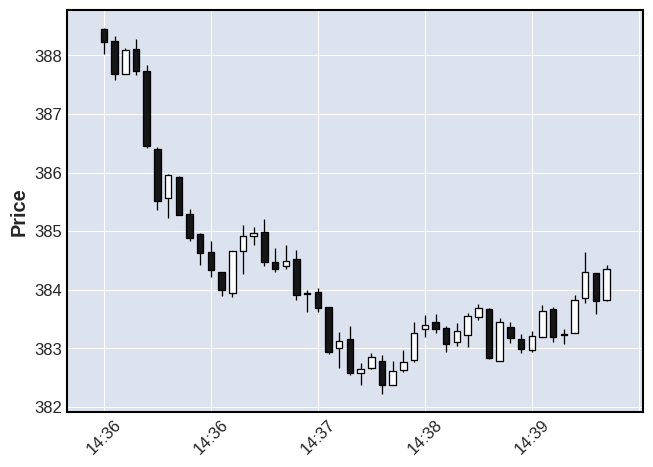

In [37]:
!pip install mplfinance -q
import mplfinance as mpf

df = spy
df.index = pd.DatetimeIndex(df['date'])

mpf.plot(df['02-11-2022 14:36':'02-11-2022 14:39'],type='candle')



As we can see above, price moved significantly starting at 14:36 (row 61), so we can see the words spoken that led up to this:

In [40]:
spy[50:70]

,date,open,high,low,close,volume,average,barCount,text,percent
date,,,,,,,,,,
2022-02-11 14:35:00,02-11-2022 14:35,386.91,387.24,386.88,387.19,24625,387.125,181,And we are continuing the process of signific...,0.072368
2022-02-11 14:35:00,02-11-2022 14:35,387.21,387.81,387.20,387.77,97840,387.514,688,NaN,0.144624
2022-02-11 14:35:00,02-11-2022 14:35,387.73,387.93,387.63,387.65,95192,387.808,475,"With today's action, we've raised interest ra...",-0.020633
2022-02-11 14:35:00,02-11-2022 14:35,387.64,387.76,387.52,387.55,30898,387.617,162,We anticipate that ongoing increases in the t...,-0.023217
2022-02-11 14:35:00,02-11-2022 14:35,387.56,388.19,387.56,388.16,148005,388.015,823,NaN,0.154815
2022-02-11 14:35:00,02-11-2022 14:35,388.15,388.63,388.14,388.22,154486,388.446,883,NaN,0.018034
2022-02-11 14:35:00,02-11-2022 14:35,388.25,388.46,388.02,388.42,51105,388.253,320,Financial conditions have tightened significa...,0.043786
2022-02-11 14:36:00,02-11-2022 14:36,388.46,388.47,388.02,388.23,61893,388.204,368,NaN,-0.059208
2022-02-11 14:36:00,02-11-2022 14:36,388.24,388.34,387.58,387.69,93311,387.940,520,"It will take time, however, for the full effe...",-0.141665


In [49]:
pd.set_option('display.max_colwidth', None)
print(spy['2022-02-11 14:35:00':'2022-02-11 14:38:00']['text'])
#we are checking what did Mr Powell say such that the SPY index level fell

date
2022-02-11 14:35:00                                                                                                                                                                                                                                                                  NaN
2022-02-11 14:35:00                                                                                                                                                                                                                                                                  NaN
2022-02-11 14:35:00                                                                                                 We are highly attentive to the risks that high inflation poses to both sides of our mandate and we're strongly committed to returning inflation to our 2% objective.
2022-02-11 14:35:00                                                                                                                                     